In [ ]:
import ee
import geemap
import os
ee.Authenticate()

In [ ]:
os.environ['HTTP_PROXY']='http://127.0.0.1:7890'
os.environ['HTTPS_PROXY']='http://127.0.0.1:7890'
ee.Initialize()

In [ ]:
Map = geemap.Map()

# 加载中国的行政边界数据（已经上传到 GEE）
china_boundary = ee.FeatureCollection("projects/chancy479/assets/province")

GX = china_boundary.filterMetadata('ID','equals','Guangxi')

Map.center_object(GX,6)
Map.addLayer(GX, {'color': 'FF0000'}, 'Guangxi Boundary')
Map

In [ ]:
#导入并筛选
dataset_LANDSAT=ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')
filtered_LANDSAT = dataset_LANDSAT.filterBounds(GX).filterDate('2022-07-01', '2022-8-15')
print('图片数量：', filtered_LANDSAT.size().getInfo())

In [ ]:
#计算单个图片的ndvi函数，返回只有ndvi的图像
def NDVI_V3(img):
    ndvi=img.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return ndvi
#返回增加ndvi的图像
def NDVI_V2(img):
    ndvi=img.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return img.addBands(ndvi)
#运用到整个collection
withNDVI=filtered_LANDSAT.map(NDVI_V2)

In [ ]:
#图表展示
# ndvi_list=withNDVI.select('NDVI')
# 创建一个函数来计算NDVI的均值
def ndvi_mean(image):
    mean = image.reduceRegion(reducer=ee.Reducer.mean(),  scale=30, maxPixels=1e9)
    return image.set('meanNDVI', mean.get('NDVI'))

# 对影像集合中的每个影像应用函数
ndvi_list_with_mean = withNDVI.map(ndvi_mean)

# 从Earth Engine中获取数据
ndvi_data = ndvi_list_with_mean.getInfo()
print(ndvi_data)


In [50]:
dates=['2022-07-24', '2022-08-09', '2022-07-08', '2022-07-24', '2022-08-09', '2022-07-08', '2022-07-24', '2022-08-09', '2022-07-15', '2022-07-31', '2022-07-15', '2022-07-31', '2022-07-15', '2022-07-31', '2022-07-15', '2022-07-31', '2022-07-06', '2022-07-22', '2022-08-07', '2022-07-22', '2022-08-07', '2022-07-22', '2022-08-07', '2022-07-22', '2022-08-07', '2022-07-13', '2022-07-29', '2022-08-14', '2022-07-13', '2022-08-14', '2022-07-13', '2022-07-29', '2022-08-14', '2022-07-13', '2022-07-29', '2022-08-14', '2022-07-04', '2022-08-05', '2022-07-04', '2022-07-20', '2022-07-04', '2022-07-20', '2022-08-05', '2022-07-04', '2022-07-20', '2022-08-05', '2022-07-11', '2022-07-27']
ndvi_values=[0.6224891229159758, 0.4137011136268202, 0.20105250432726193, 0.5673816183536797, 0.17058578851900366, 0.10411045655263941, 0.25172195517759344, 0.10414962175388275, 0.5148410472982334, 0.460596666170623, 0.41311768861829795, 0.3627487050384729, 0.3702207097772434, 0.47953007793086894, 0.20745407611457298, 0.30214927623114585, 0.40143209577166683, 0.42895330585556235, 0.42055707507464596, 0.45755543920681835, 0.3581472181111591, 0.481879096948566, 0.3701783282988511, 0.21730183979146997, 0.16182136408745054, 0.4932463238150221, 0.23479611709647968, 0.26695998444664165, 0.49727704624093333, 0.2703583233797422, 0.4703663168026691, 0.31960862224383996, 0.4023258286336314, 0.3053730280747405, 0.3826728215756906, 0.32559575041099725, 0.4480053285881517, 0.24339032621214954, 0.5566915699788084, 0.2191250107203655, 0.3950761678995294, 0.28238829640718593, 0.18895053471937265, 0.34159249949738946, 0.23883686409757973, 0.2303898068911841, 0.43632013766982236, 0.6255348817058678]

from collections import defaultdict
# 使用 defaultdict 存储相同日期的值
date_to_values = defaultdict(list)

# 将相同日期的值存储在 defaultdict 中
for date, value in zip(dates, ndvi_values):
    date_to_values[date].append(value)

# 计算每个日期的平均值
unique_dates = []
average_ndvi_values = []

for date, values in date_to_values.items():
    unique_dates.append(date)
    average_value = sum(values) / len(values)
    average_ndvi_values.append(average_value)

# 输出唯一日期和平均值
print(unique_dates)
print(average_ndvi_values)
# 将日期和 NDVI 值列表进行排序并分别保存
sorted_data = sorted(zip(unique_dates, average_ndvi_values), key=lambda x: x[0])
sorted_dates, sorted_ndvi_values = zip(*sorted_data)
# 输出排序后的日期和 NDVI 值
print(sorted_dates)
print(sorted_ndvi_values)


['2022-07-24', '2022-08-09', '2022-07-08', '2022-07-15', '2022-07-31', '2022-07-06', '2022-07-22', '2022-08-07', '2022-07-13', '2022-07-29', '2022-08-14', '2022-07-04', '2022-08-05', '2022-07-20', '2022-07-11', '2022-07-27']
[0.48053089881574956, 0.22947884129990223, 0.15258148043995068, 0.3764083804520869, 0.40125618134277763, 0.40143209577166683, 0.39642242045060416, 0.3276759963930267, 0.44156567873334124, 0.31235918697200343, 0.31630997171775316, 0.43534139149096973, 0.22091022260756876, 0.24678339040837707, 0.43632013766982236, 0.6255348817058678]
('2022-07-04', '2022-07-06', '2022-07-08', '2022-07-11', '2022-07-13', '2022-07-15', '2022-07-20', '2022-07-22', '2022-07-24', '2022-07-27', '2022-07-29', '2022-07-31', '2022-08-05', '2022-08-07', '2022-08-09', '2022-08-14')
(0.43534139149096973, 0.40143209577166683, 0.15258148043995068, 0.43632013766982236, 0.44156567873334124, 0.3764083804520869, 0.24678339040837707, 0.39642242045060416, 0.48053089881574956, 0.6255348817058678, 0.31235

In [52]:
print(len(sorted_dates))

16


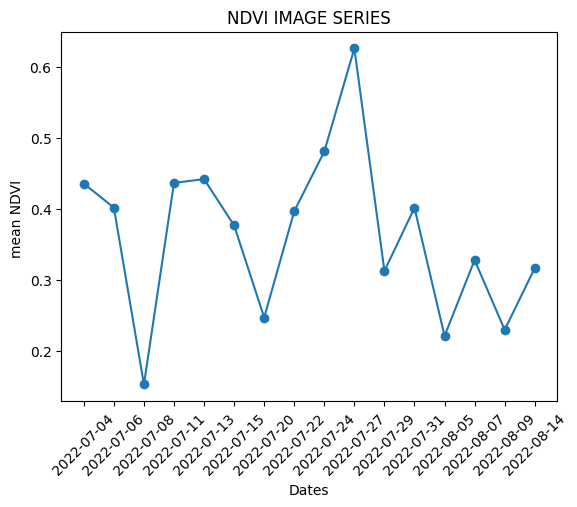

In [51]:
import matplotlib.pyplot as plt
x_values=sorted_dates
y_values=sorted_ndvi_values

plt.xticks(range(len(x_values)), x_values)
plt.plot(x_values, y_values,  marker='o', linestyle='-')
plt.title('NDVI IMAGE SERIES')
plt.xlabel('Dates')
plt.ylabel('mean NDVI ')
plt.xticks(rotation=45)

plt.show()